In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib
%matplotlib inline
from IPython.display import display, HTML
import warnings
warnings.filterwarnings('ignore')

In [5]:
from google.colab import drive  
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Loading the dataset

In [6]:
df = pd.read_csv("/content/Loan Prediction Dataset.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# Exploratory Data Analysis (EDA)
- Need to get a better understanding of the given data.
- Questions like:
- How much data do we have?
- Are there are any missing values?
- What is the data type of each column?
- What is the distribution of data in each column?
- Do we see any outliers?

In [7]:
#summary 
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.5,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.0,1188.5,2297.25,41667.0
LoanAmount,592.0,146.412162,85.587325,9.0,100.0,128.0,168.00,700.0
Loan_Amount_Term,600.0,342.000000,65.120410,12.0,360.0,360.0,360.00,480.0
Credit_History,564.0,0.842199,0.364878,0.0,1.0,1.0,1.00,1.0


In [8]:
print("Number of rows: ", df.shape[0])
counts = df.describe().iloc[0]
display(pd.DataFrame(counts.tolist(), columns=["Count of values"], index=counts.index.values).transpose())

Number of rows:  614


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
Count of values,614.0,614.0,592.0,600.0,564.0


In [9]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


# Data Wrangling 

# Handling Missing Values & Outlier Handling

In order to check missing values in Pandas DataFrame, we use a function isnull() and notnull() . Both function help in checking whether a value is NaN or not. These function can also be used in Pandas Series in order to find null values in a series

In [11]:
df.isnull().any()

Loan_ID              False
Gender                True
Married               True
Dependents            True
Education            False
Self_Employed         True
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount            True
Loan_Amount_Term      True
Credit_History        True
Property_Area        False
Loan_Status          False
dtype: bool

In [12]:
# Heatmap to check missing values 

<Axes: >

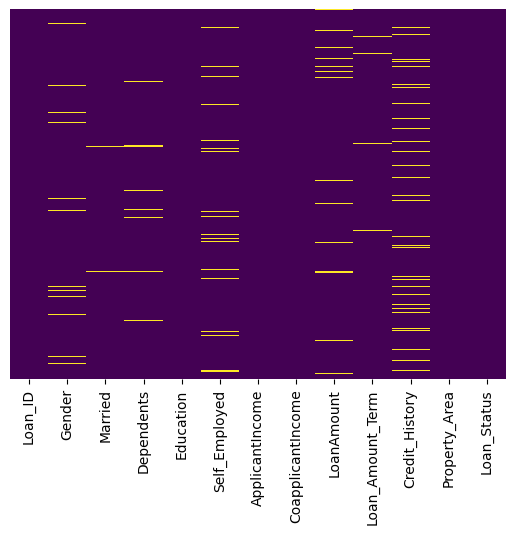

In [13]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [14]:
# Number of Missing Values

In [15]:
# find the null values
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [16]:
# fill the missing values for numerical terms - mean
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mean())

In [17]:
# fill the missing values for categorical terms - mode
df['Gender'] = df["Gender"].fillna(df['Gender'].mode()[0])
df['Married'] = df["Married"].fillna(df['Married'].mode()[0])
df['Dependents'] = df["Dependents"].fillna(df['Dependents'].mode()[0])
df['Self_Employed'] = df["Self_Employed"].fillna(df['Self_Employed'].mode()[0])

In [18]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

<Axes: >

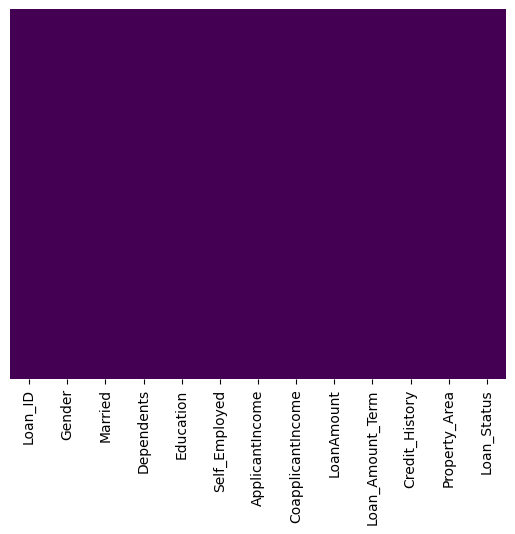

In [19]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [20]:
# group by command to find mean of multiple colums 
df_Loan_Loan_Amount_Term =df.groupby(["LoanAmount","ApplicantIncome"],as_index=False).Loan_Amount_Term.mean()

print(df_Loan_Loan_Amount_Term)


     LoanAmount  ApplicantIncome  Loan_Amount_Term
0           9.0             2378             360.0
1          17.0             1299             120.0
2          25.0             3459             120.0
3          25.0             3620             120.0
4          26.0             5468             360.0
..          ...              ...               ...
607       570.0            19730             360.0
608       600.0            19484             360.0
609       600.0            39999             180.0
610       650.0            20166             480.0
611       700.0            51763             300.0

[612 rows x 3 columns]


<Axes: xlabel='Dependents', ylabel='count'>

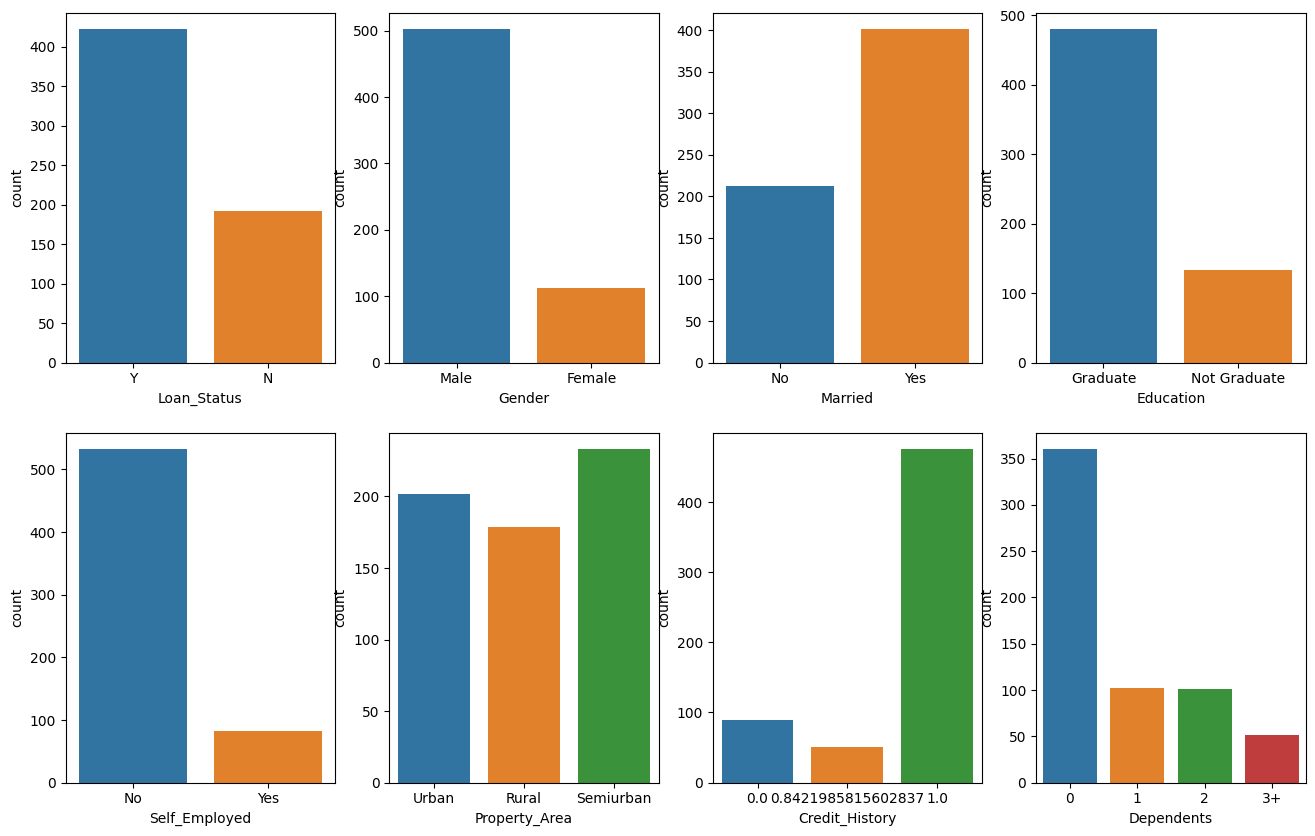

In [21]:
# Univariate Analysis:
# categorical attributes visualization
fig,ax = plt.subplots(2,4,figsize=(16,10))
sns.countplot(x='Loan_Status', data = df, ax=ax[0][0])
sns.countplot(x='Gender', data = df, ax=ax[0][1])
sns.countplot(x='Married', data = df, ax=ax[0][2])
sns.countplot(x='Education', data = df, ax=ax[0][3])
sns.countplot(x='Self_Employed', data = df, ax=ax[1][0])
sns.countplot(x='Property_Area', data = df, ax=ax[1][1])
sns.countplot(x='Credit_History', data = df, ax=ax[1][2])
sns.countplot(x='Dependents', data = df, ax=ax[1][3])

# Checking for data imbalance

The class imbalance problem typically occurs when there are many more instances of some classes than others. In such cases, standard classifiers tend to be overwhelmed by the large classes and ignore the small ones.

In [22]:
print('The percentage of Y class : %.2f' % (df['Loan_Status'].value_counts()[0] / len(df)))
print('The percentage of N class : %.2f' % (df['Loan_Status'].value_counts()[1] / len(df)))


The percentage of Y class : 0.69
The percentage of N class : 0.31


In [23]:
# total income
df['Total_Income'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,6000.0


<Axes: xlabel='Loan_Status', ylabel='Total_Income'>

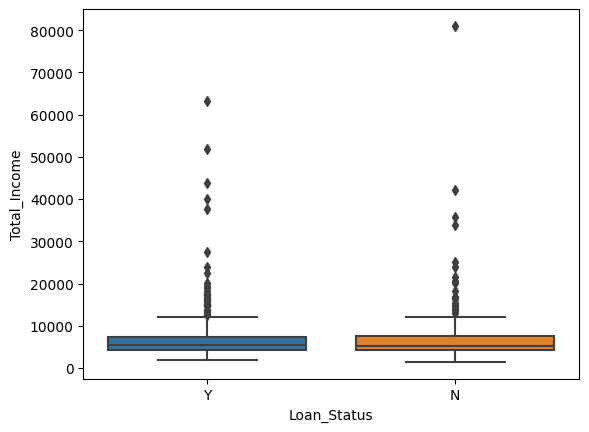

In [24]:
# Bivariate Analysis
sns.boxplot(x='Loan_Status', y='Total_Income', data=df)

<Axes: xlabel='Total_Income', ylabel='Gender'>

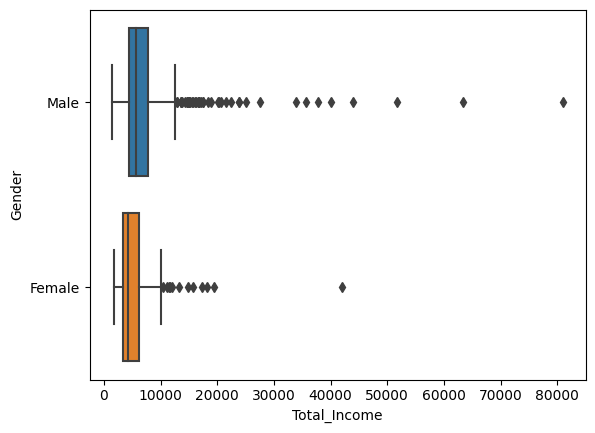

In [25]:
sns.boxplot(x='Total_Income', y='Gender', data=df)

In [26]:
#The mean value of Loan Amount applied by males (0) is slightly higher than Females(1).

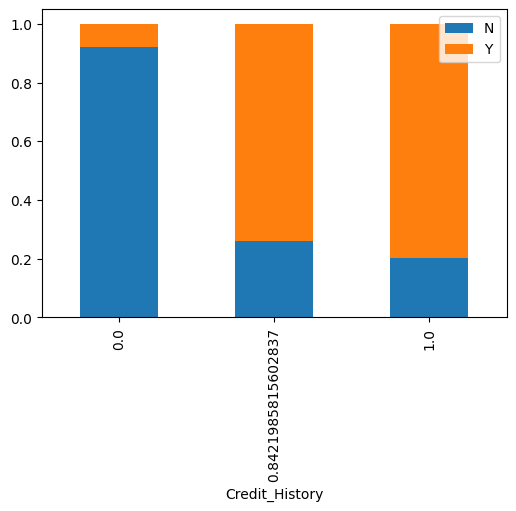

In [27]:
Credit_History = pd.crosstab(df['Credit_History'], df['Loan_Status'])
Credit_History.div(Credit_History.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(6,4))
plt.legend(loc = 'best')

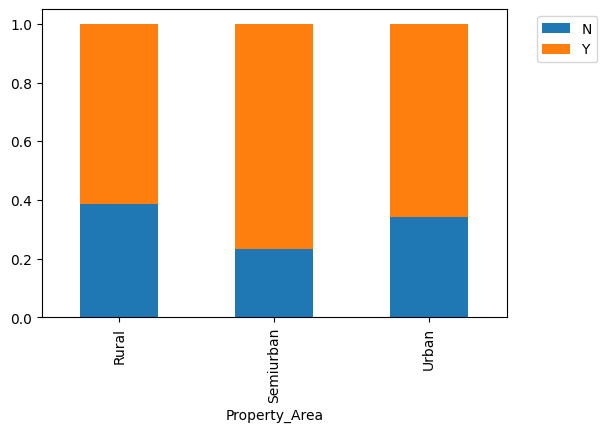

In [28]:
Property_Area = pd.crosstab(df['Property_Area'], df['Loan_Status'])
Property_Area.div(Property_Area.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(6,4))
plt.legend(bbox_to_anchor=(1.05,1.0),loc='best')

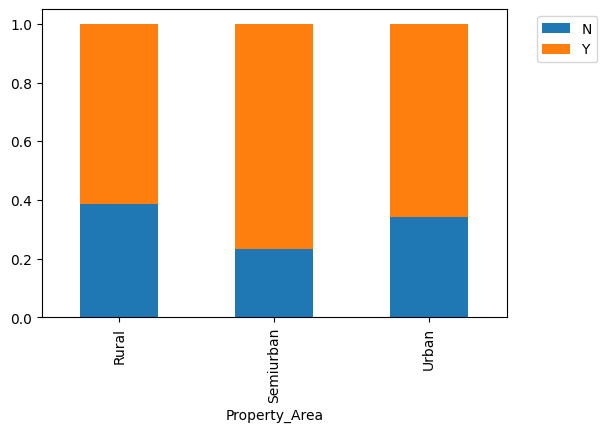

In [29]:
Property_Area = pd.crosstab(df['Property_Area'], df['Loan_Status'])
Property_Area.div(Property_Area.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(6,4))
plt.legend(bbox_to_anchor=(1.05,1.0),loc='best')

<Axes: xlabel='ApplicantIncome', ylabel='Density'>

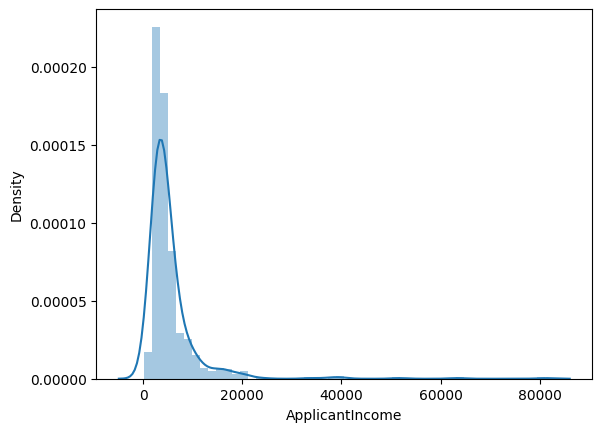

In [30]:
# numerical attributes visualization
sns.distplot(df["ApplicantIncome"])

<Axes: xlabel='CoapplicantIncome', ylabel='Density'>

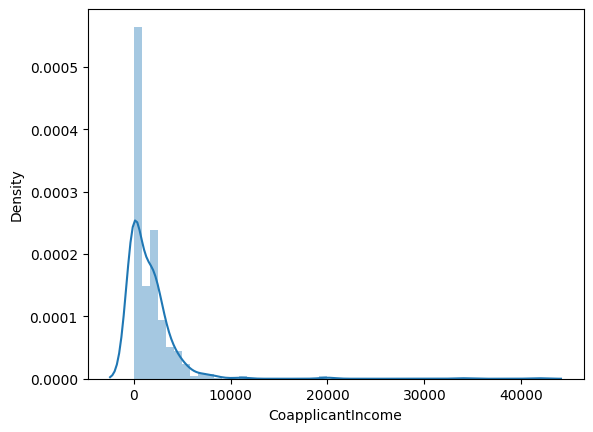

In [31]:
sns.distplot(df["CoapplicantIncome"])

<Axes: xlabel='LoanAmount', ylabel='Density'>

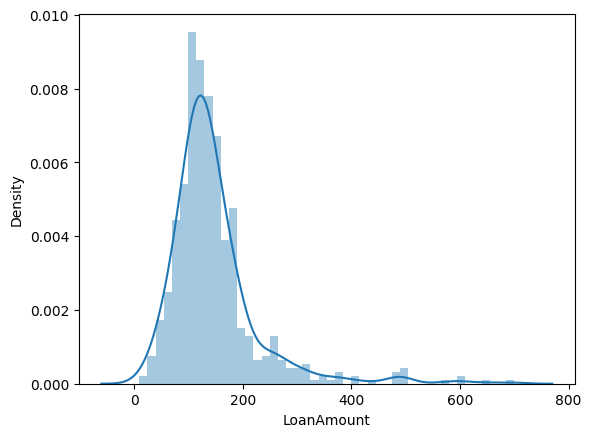

In [32]:
sns.distplot(df["LoanAmount"])

<Axes: xlabel='Loan_Amount_Term', ylabel='Density'>

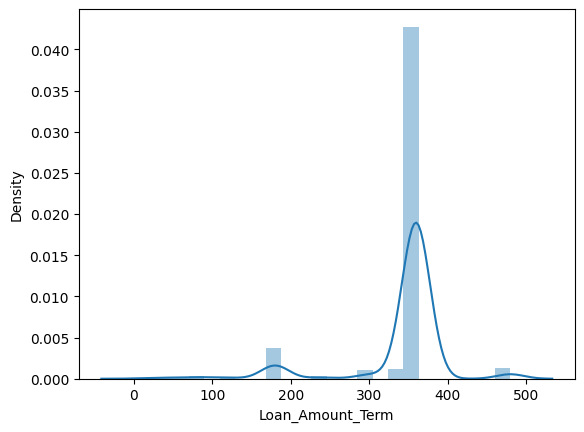

In [33]:
sns.distplot(df['Loan_Amount_Term'])

<Axes: xlabel='Credit_History', ylabel='Density'>

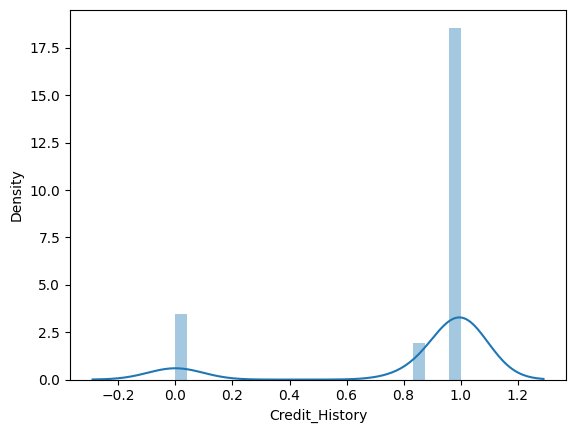

In [34]:
sns.distplot(df['Credit_History'])

## Log Transformation

<Axes: xlabel='ApplicantIncomeLog', ylabel='Density'>

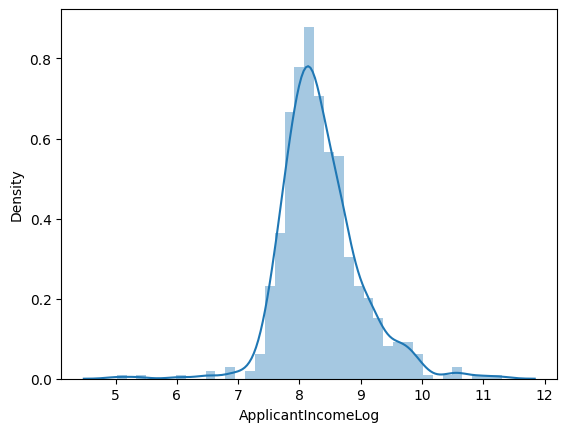

In [35]:
# apply log transformation to the attribute
df['ApplicantIncomeLog'] = np.log(df['ApplicantIncome']+1)
sns.distplot(df["ApplicantIncomeLog"])

<Axes: xlabel='CoapplicantIncomeLog', ylabel='Density'>

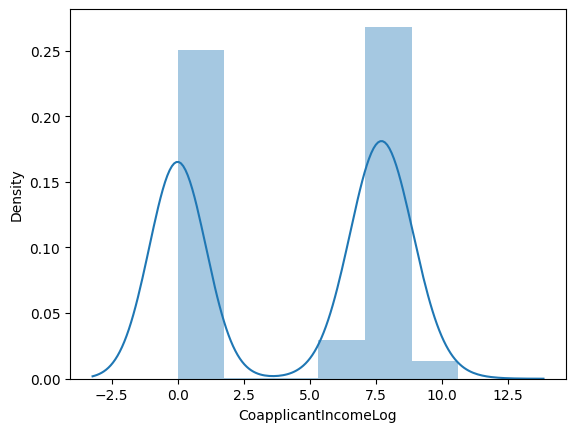

In [36]:
df['CoapplicantIncomeLog'] = np.log(df['CoapplicantIncome']+1)
sns.distplot(df["CoapplicantIncomeLog"])

<Axes: xlabel='LoanAmountLog', ylabel='Density'>

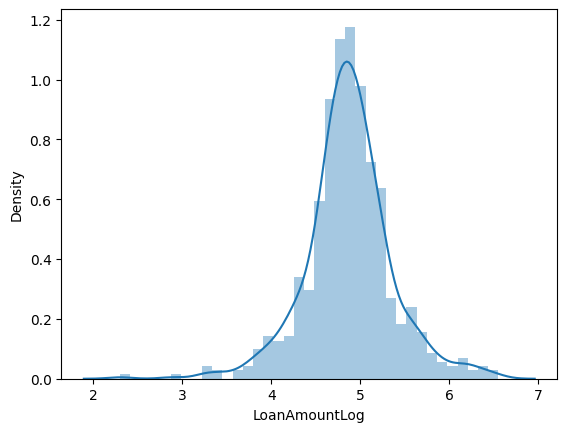

In [37]:
df['LoanAmountLog'] = np.log(df['LoanAmount']+1)
sns.distplot(df["LoanAmountLog"])

<Axes: xlabel='Loan_Amount_Term_Log', ylabel='Density'>

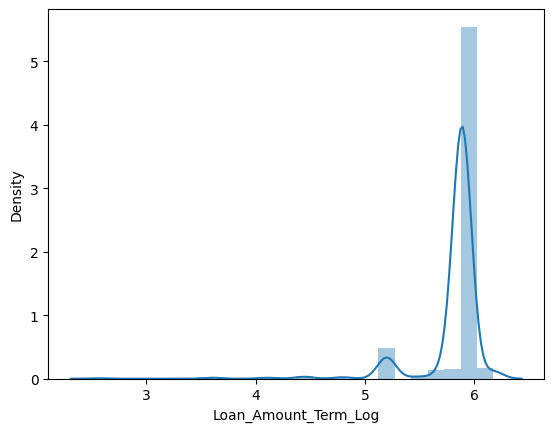

In [38]:
df['Loan_Amount_Term_Log'] = np.log(df['Loan_Amount_Term']+1)
sns.distplot(df["Loan_Amount_Term_Log"])

In [39]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income,ApplicantIncomeLog,CoapplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,5849.0,8.674197,0.000000,4.993232,5.888878
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,6091.0,8.430327,7.319202,4.859812,5.888878
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,3000.0,8.006701,0.000000,4.204693,5.888878
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4941.0,7.857094,7.765993,4.795791,5.888878
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,6000.0,8.699681,0.000000,4.955827,5.888878


<Axes: xlabel='Total_Income_Log', ylabel='Density'>

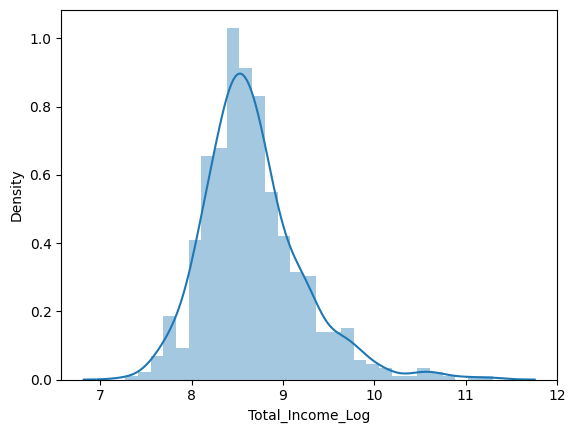

In [40]:
df['Total_Income_Log'] = np.log(df['Total_Income']+1)
sns.distplot(df["Total_Income_Log"])

In [41]:
# What's the probability of a customer having 1 credit History 

In [42]:
# Here we get the count of rows having n_kids =2, df_person_data.n_kids == 2 is the condition to filter rows
# shape[0] return count of rows.
a = df[df.Credit_History == 1].shape[0]
total =df.shape[0] # getting total rows
p_a = a/total # probabilty formula --> p(a) = event/total
print(f"Probability of customer having 1 Credit_History is {round(p_a,4)}")

Probability of customer having 1 Credit_History is 0.7736


## Coorelation Matrix

<Axes: >

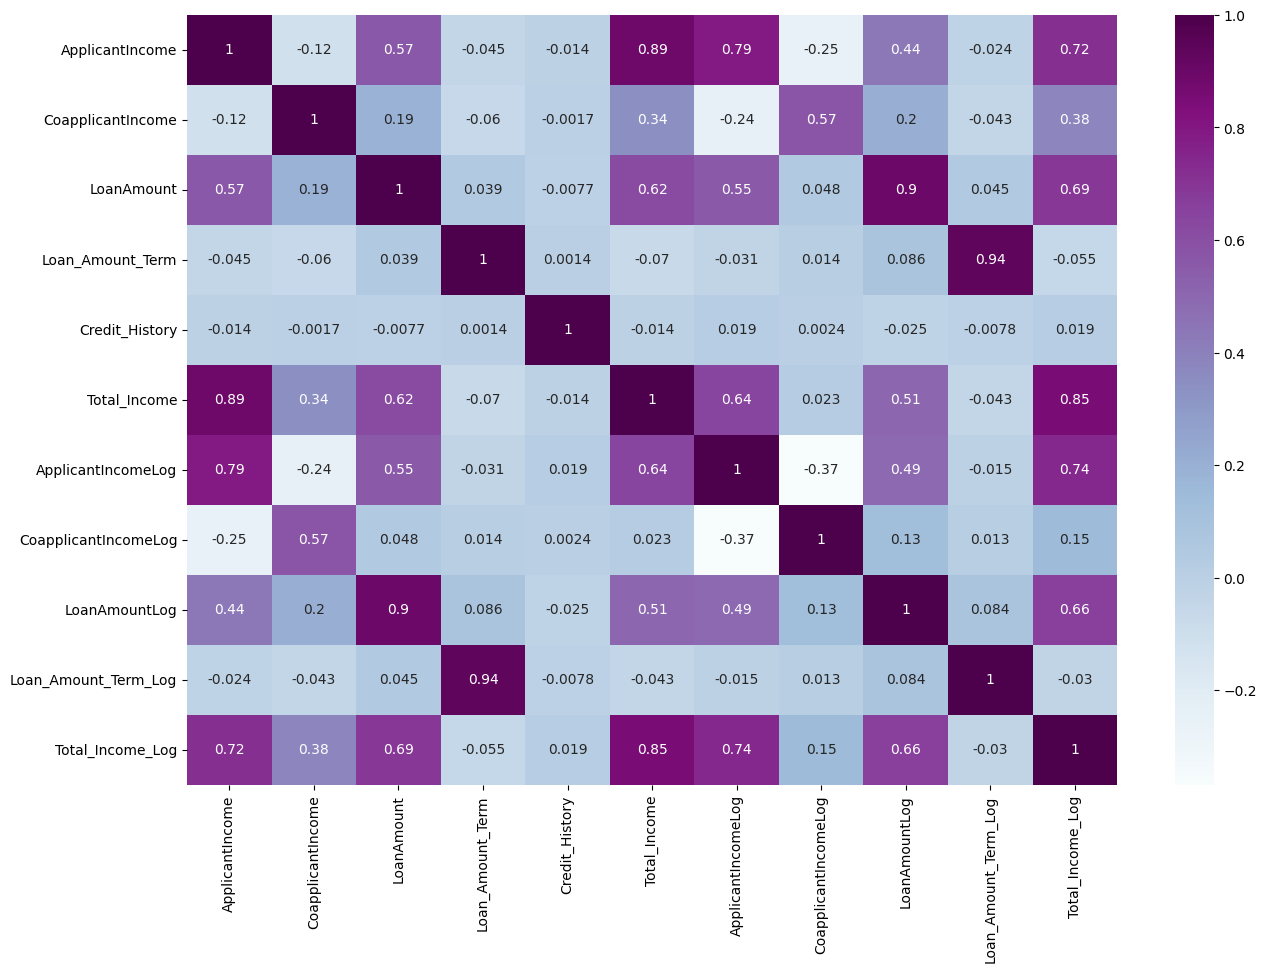

In [43]:
corr = df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot = True, cmap="BuPu")

In [44]:
df.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Total_Income,ApplicantIncomeLog,CoapplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log,Total_Income_Log
ApplicantIncome,1.000000,-0.116605,0.565620,-0.045242,-0.014477,0.893037,0.790658,-0.250433,0.436606,-0.024347,0.717856
CoapplicantIncome,-0.116605,1.000000,0.187828,-0.059675,-0.001665,0.342781,-0.237860,0.573648,0.204492,-0.043119,0.383831
LoanAmount,0.565620,0.187828,1.000000,0.038801,-0.007738,0.620102,0.551656,0.047522,0.897671,0.044905,0.687560
Loan_Amount_Term,-0.045242,-0.059675,0.038801,1.000000,0.001395,-0.069830,-0.030741,0.013613,0.085940,0.940881,-0.055321
Credit_History,-0.014477,-0.001665,-0.007738,0.001395,1.000000,-0.014447,0.019183,0.002384,-0.024909,-0.007773,0.019154
Total_Income,0.893037,0.342781,0.620102,-0.069830,-0.014447,1.000000,0.640090,0.023028,0.505622,-0.042566,0.852901
ApplicantIncomeLog,0.790658,-0.237860,0.551656,-0.030741,0.019183,0.640090,1.000000,-0.368258,0.492560,-0.014723,0.740402
CoapplicantIncomeLog,-0.250433,0.573648,0.047522,0.013613,0.002384,0.023028,-0.368258,1.000000,0.130524,0.012895,0.149070
LoanAmountLog,0.436606,0.204492,0.897671,0.085940,-0.024909,0.505622,0.492560,0.130524,1.000000,0.084301,0.658957
Loan_Amount_Term_Log,-0.024347,-0.043119,0.044905,0.940881,-0.007773,-0.042566,-0.014723,0.012895,0.084301,1.000000,-0.029705


In [45]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income,ApplicantIncomeLog,CoapplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log,Total_Income_Log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,5849.0,8.674197,0.000000,4.993232,5.888878,8.674197
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,6091.0,8.430327,7.319202,4.859812,5.888878,8.714732
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,3000.0,8.006701,0.000000,4.204693,5.888878,8.006701
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4941.0,7.857094,7.765993,4.795791,5.888878,8.505525
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,6000.0,8.699681,0.000000,4.955827,5.888878,8.699681


# Data Preprocessing & Feature Engineering
- Feature space is almost unchanged¶
- Remove irrelevant columns
- Convert strings to boolean values

In [46]:
# drop unnecessary columns
cols = ['ApplicantIncome', 'CoapplicantIncome', "LoanAmount", "Loan_Amount_Term", "Total_Income", 'Loan_ID', 'CoapplicantIncomeLog']
df = df.drop(columns=cols, axis=1)
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log,Total_Income_Log
0,Male,No,0,Graduate,No,1.0,Urban,Y,8.674197,4.993232,5.888878,8.674197
1,Male,Yes,1,Graduate,No,1.0,Rural,N,8.430327,4.859812,5.888878,8.714732
2,Male,Yes,0,Graduate,Yes,1.0,Urban,Y,8.006701,4.204693,5.888878,8.006701
3,Male,Yes,0,Not Graduate,No,1.0,Urban,Y,7.857094,4.795791,5.888878,8.505525
4,Male,No,0,Graduate,No,1.0,Urban,Y,8.699681,4.955827,5.888878,8.699681


In [47]:
from sklearn.preprocessing import LabelEncoder
cols = ['Gender',"Married","Education",'Self_Employed',"Property_Area","Loan_Status","Dependents"]
le = LabelEncoder()
for col in cols:
    df[col] = le.fit_transform(df[col])

In [48]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log,Total_Income_Log
0,1,0,0,0,0,1.0,2,1,8.674197,4.993232,5.888878,8.674197
1,1,1,1,0,0,1.0,0,0,8.430327,4.859812,5.888878,8.714732
2,1,1,0,0,1,1.0,2,1,8.006701,4.204693,5.888878,8.006701
3,1,1,0,1,0,1.0,2,1,7.857094,4.795791,5.888878,8.505525
4,1,0,0,0,0,1.0,2,1,8.699681,4.955827,5.888878,8.699681


# Model Modeling 

## Train-Test Split

In [49]:
# specify input and output attributes
X = df.drop(columns=['Loan_Status'], axis=1)
y = df['Loan_Status']

In [50]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [51]:
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split, RandomizedSearchCV
from sklearn.metrics import precision_score, recall_score, confusion_matrix,  roc_curve, precision_recall_curve, accuracy_score, roc_auc_score

from sklearn.metrics import roc_curve,auc
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_predict

In [52]:
# classify function
from sklearn.model_selection import cross_val_score
def classify(model, x, y):
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
    model.fit(x_train, y_train)
    print("Accuracy is", model.score(x_test, y_test)*100)
    # cross validation - it is used for better validation of model
    # eg: cv-5, train-4, test-1
    score = cross_val_score(model, x, y, cv=5)
    print("Cross validation is",np.mean(score)*100)

In [53]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
classify(model, X, y)

Accuracy is 77.27272727272727
Cross validation is 80.9462881514061


In [54]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
classify(model, X, y)

Accuracy is 70.77922077922078
Cross validation is 70.52778888444622


In [55]:
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
model = RandomForestClassifier()
classify(model, X, y)

Accuracy is 79.22077922077922
Cross validation is 79.32027189124351


In [56]:
model = ExtraTreesClassifier()
classify(model, X, y)

Accuracy is 73.37662337662337
Cross validation is 77.36638677862189


In [57]:
# classify function
from sklearn.model_selection import cross_val_score
def classify(modelhy, x, y):
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
    modelhy.fit(x_train, y_train)
    print("Accuracy is", modelhy.score(x_test, y_test)*100)
    # cross validation - it is used for better validation of model
    # eg: cv-5, train-4, test-1
    score = cross_val_score(modelhy, x, y, cv=5)
    print("Cross validation is",np.mean(score)*100)

## Hyperparameter tuning

In [58]:
modelhy = RandomForestClassifier(n_estimators=110, min_samples_split=15, max_depth=8, max_features=1)
classify(modelhy, X, y)

Accuracy is 77.27272727272727
Cross validation is 79.80674396907904


## Confusion Matrix

A confusion matrix is a summary of prediction results on a classification problem. The number of correct and incorrect predictions are summarized with count values and broken down by each class. It gives us insight not only into the errors being made by a classifier but more importantly the types of errors that are being made.

# How do you evaluate your model?

### - Different situations or business problems call for different metrics

### - The most basic summary is given by the Confusion Matrix
![Figure 1-1](cm.png "Figure 1-1")

### - Type I & II Errors (False Positives / False Negatives)

### - Then you can consider:
>### - Accuracy
>### - Precision
>### - Recall
>### - Lift
>### - Support
>### - Confidence etc.
![Figure 1-2](metrics.png "Figure 1-2")

 ### - Many, many more metrics have been proposed:
![Figure 1-3](many.png "Figure 1-3")

In [59]:
modelrm = RandomForestClassifier()
modelrm.fit(x_train, y_train)

RandomForestClassifier()

In [60]:
y_pred=modelrm.predict(x_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",modelrm.score(x_train,y_train)*100)
print("Mean Squared Error:\n",mean_squared_error(y_test,y_pred))
print("R2 score is:\n",r2_score(y_test,y_pred))

Classification Report is:
               precision    recall  f1-score   support

           0       0.81      0.46      0.59        54
           1       0.76      0.94      0.84       100

    accuracy                           0.77       154
   macro avg       0.79      0.70      0.72       154
weighted avg       0.78      0.77      0.75       154

Confusion Matrix:
 [[25 29]
 [ 6 94]]
Training Score:
 100.0
Mean Squared Error:
 0.22727272727272727
R2 score is:
 0.0018518518518517713


Text(0.5, 23.52222222222222, 'Predicted label')

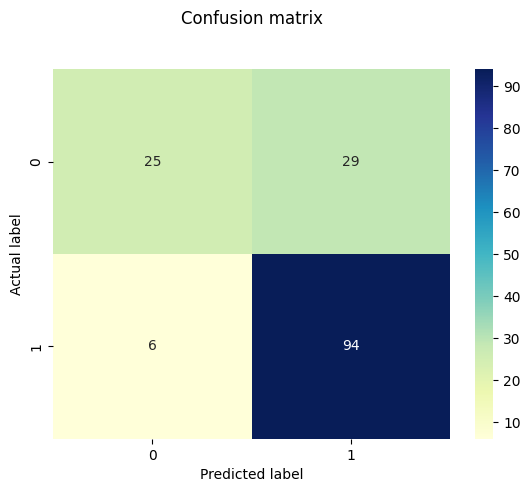

In [61]:
ypred = modelrm.predict(x_test)
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [62]:
# Test on other models ??

# ROC CURVE 
ROC curves are frequently used to show in a graphical way the connection/trade-off between clinical sensitivity and specificity for every possible cut-off for a test or a combination of tests. In addition the area under the ROC curve gives an idea about the benefit of using the test(s) in question.
AUC - ROC curve is a performance measurement for the classification problems at various threshold settings. ROC is a probability curve and AUC represents the degree or measure of separability. It tells how much the model is capable of distinguishing between classes.

In [63]:
from sklearn.metrics import roc_curve

In [64]:
#Get predictions of Random Forest and Logistic Regression models in the form of probability values
y_lg_prob = model.predict_proba(x_test)[:,1]
y_rfc_prob =  modelrm.predict_proba(x_test)[:,1]

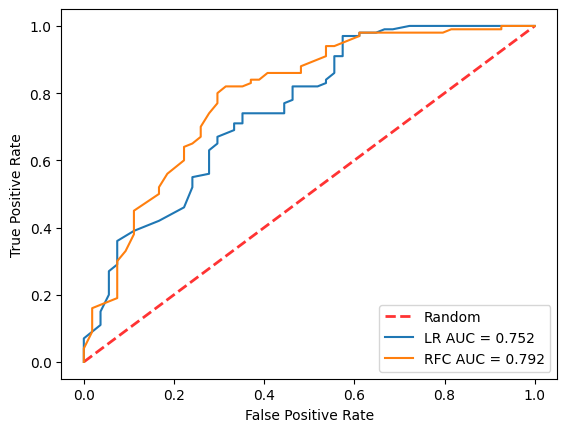

In [65]:
#For Logistic Regression
fpr, tpr, _ = metrics.roc_curve(y_test,y_lg_prob)
auc = metrics.roc_auc_score(y_test, y_lg_prob)

#For Random Forest
fpr1, tpr1, _1 = metrics.roc_curve(y_test,y_rfc_prob)
auc1 = metrics.roc_auc_score(y_test, y_rfc_prob)

#create ROC curve
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',label='Random', alpha=.8)
plt.plot(fpr,tpr,label="LR AUC = "+str(round(auc,3)))
plt.plot(fpr1,tpr1,label="RFC AUC = "+str(round(auc1,3)))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

<Axes: >

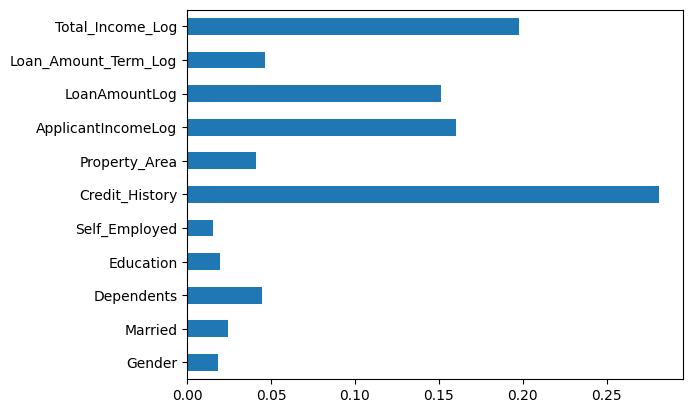

In [66]:
# Getting feature importances for Random Forest model
(pd.Series(modelrm.feature_importances_, index=x_train.columns).plot(kind='barh'))

In [67]:
#understanding which variable(s) have the largest impact on the outcome.
featimp = pd.Series(modelrm.feature_importances_, index=x_train.columns).sort_values(ascending=False) 
print(featimp)

Credit_History          0.281388
Total_Income_Log        0.197509
ApplicantIncomeLog      0.160185
LoanAmountLog           0.151045
Loan_Amount_Term_Log    0.046187
Dependents              0.044905
Property_Area           0.041036
Married                 0.024524
Education               0.019324
Gender                  0.018264
Self_Employed           0.015634
dtype: float64
